In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import random

In [2]:
def create_samples(random_start=0,num_of_samples=1,size=1000):

    datasets = []
    for i in range(random_start,random_start+num_of_samples):
        # Set the seed for reproducibility
        np.random.seed(i)

        # Sample from a population 
        rng = np.random.default_rng()
        sample = rng.choice(10000000, size, replace=False)
        datasets.append(sample+1)

    return datasets

In [3]:
def full_information_simulate(samples,threshold=0.5,verbose=0):
    positives = 0 
    stop_index = []
    for sample in samples:
        dynamic_look_size=0
        for instance in sample:
            best = np.max(sample)
            dynamic_look_size+=1
            # Calculate z-value from the SD and mean
            current_best = np.max(sample[0:dynamic_look_size])
            if (verbose>2):
                print("Candidate No:",dynamic_look_size,"Current Best:",current_best,"Instance:",instance)
            if(instance==current_best):

                prob_worse_next = (instance - 1) / 10000000 #change 1 to dynamic_look_size
                remaining_size=len(sample)-dynamic_look_size
                prob_better_remaining = 1 - (prob_worse_next**remaining_size) 
                if (verbose>1):
                    print("Candidate No:",dynamic_look_size, "Score: ", instance,"Prob better remaining: ", prob_better_remaining, "Rem-size:",remaining_size  )
                # Select if prob better is less than threshold=0.5 
                if(prob_better_remaining<threshold):
                    if(instance==best):
                        if (verbose>0):
                            print("****WIN******" )
                        positives=positives+1
#                     else:
#                         print("False positive: (Leap)  ", instance, "-",leap_max,"AT:",dynamic_look_size )
                    break

        stop_index.append(dynamic_look_size)

    accuracy = positives / len(samples)
    print("\n*******Win Rate for size:",len(samples[0]) ,"treshold:",threshold,"% is:", accuracy,"*******" )
    return accuracy,stop_index

In [4]:
size_list=[100,200,400,1000,2000,5000,10000]
scores=[]
for size_c in size_list:
    samples = create_samples(random_start=size_c,num_of_samples=10000,size=size_c)
    acc,stop  = full_information_simulate(samples,0.5,0)
    scores.append(acc)


*******Win Rate for size: 100 treshold: 0.5 % is: 0.586 *******

*******Win Rate for size: 200 treshold: 0.5 % is: 0.5755 *******

*******Win Rate for size: 400 treshold: 0.5 % is: 0.5745 *******

*******Win Rate for size: 1000 treshold: 0.5 % is: 0.5777 *******

*******Win Rate for size: 2000 treshold: 0.5 % is: 0.5752 *******

*******Win Rate for size: 5000 treshold: 0.5 % is: 0.5778 *******

*******Win Rate for size: 10000 treshold: 0.5 % is: 0.5839 *******


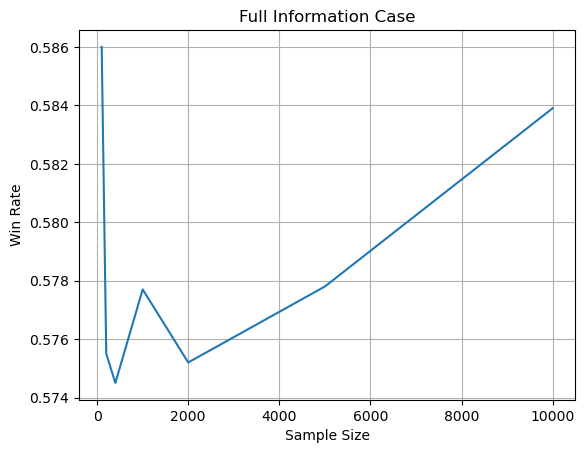

In [5]:
#Plot 
x = size_list
y = scores
plt.plot(x, y)
#set title and x, y - axes labels
plt.title('Full Information Case')
plt.xlabel('Sample Size')
plt.ylabel('Win Rate')
plt.grid()